<a href="https://colab.research.google.com/github/Sohaib-Khattak/Learn-Log/blob/main/Home%20Prices%20Predictions%20On%20The%20Base%20Of%20Living%20Area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** LOAD LIABRARIES**

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**LOAD THE DATA FROM CSV/XLSX**

In [ ]:
data=pd.read_excel("iowa_home_prices_stats.xlsx")
print(data)

  Statistic      Bedrooms      Price      Lot_Size   Living_Area  \
0     count  13580.000000    13580.0  13580.000000  13580.000000   
1      mean      2.937997  1075684.0     10.137776   3105.301915   
2       std      0.955748   639310.7      5.868725     90.676964   
3       min      1.000000    85000.0      0.000000   3000.000000   
4      0.25      2.000000   650000.0      6.100000   3044.000000   
5       0.5      3.000000   903000.0      9.200000   3084.000000   
6      0.75      3.000000  1330000.0     13.000000   3148.000000   
7       max     10.000000  9000000.0     48.100000   3977.000000   

      Bathrooms        Floors        Garage     Year_Built  Lot_Frontage  \
0  13580.000000  13580.000000  13518.000000   13580.000000   7130.000000   
1      2.914728      1.534242      1.610075     558.416127    151.967650   
2      0.965921      0.691712      0.962634    3990.669241    541.014538   
3      0.000000      0.000000      0.000000       0.000000      0.000000   
4      

In [ ]:
print(data.columns)

Index(['Statistic', 'Bedrooms', 'Price', 'Lot_Size', 'Living_Area',
       'Bathrooms', 'Floors', 'Garage', 'Year_Built', 'Lot_Frontage',
       'Year_Sold', 'Lat', 'Long', 'House_ID'],
      dtype='object')


**visualize the data on chart**

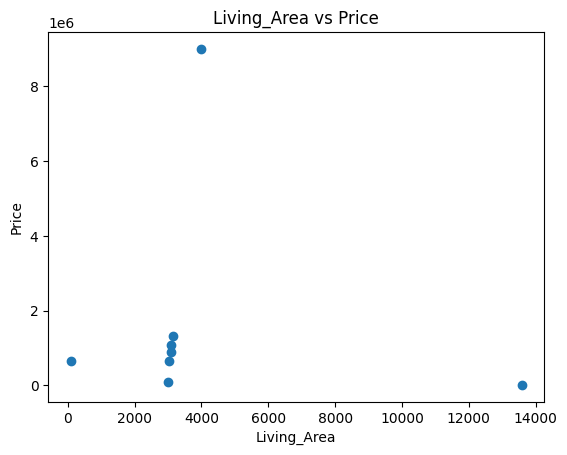

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data["Living_Area"], data["Price"])
plt.xlabel("Living_Area")
plt.ylabel("Price")
plt.title("Living_Area vs Price")
plt.show()


**Split the data into test and train data**

Index(['Statistic', 'Bedrooms', 'Price', 'Lot_Size', 'Living_Area',
       'Bathrooms', 'Floors', 'Garage', 'Year_Built', 'Lot_Frontage',
       'Year_Sold', 'Lat', 'Long', 'House_ID'],
      dtype='object')


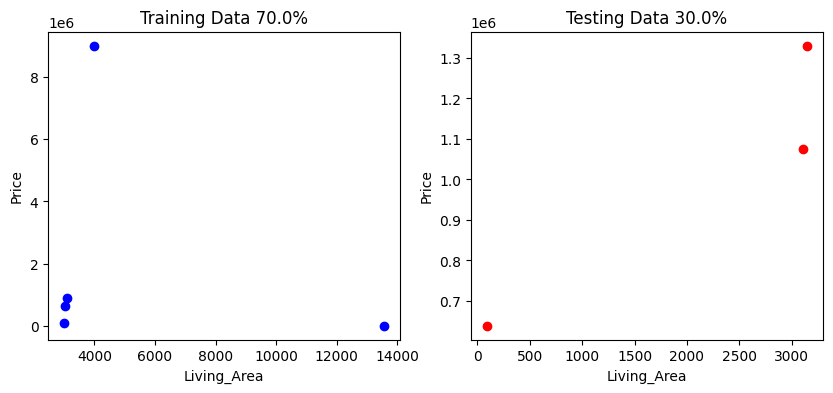

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# check column names
print(data.columns)

# split
x_train, x_test, y_train, y_test = train_test_split(
    data['Living_Area'], data['Price'], test_size=0.3, random_state=0
)

plt.figure(figsize=(10,4))

# Training data
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('Living_Area')
plt.ylabel('Price')
plt.title(f'Training Data {(1-0.3)*100}%')

# Testing data
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='red')
plt.xlabel('Living_Area')
plt.ylabel('Price')
plt.title(f'Testing Data {(0.3)*100}%')

plt.show()


**Choosing Model**

In [ ]:
model=LinearRegression()

In [ ]:
x_train=x_train.values.reshape(-1,1)

**MOdel Training**

In [ ]:
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
print("ModelTrainning Is Completed")

ModelTrainning Is Completed


**Predict The Test Value For Testing**

In [ ]:
y_predict = model.predict(x_test.values.reshape(-1,1))

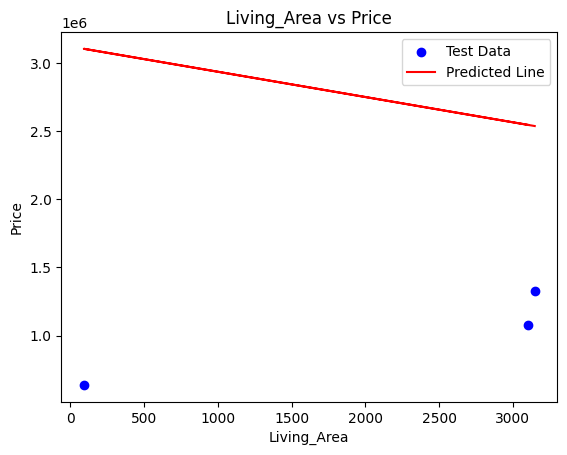

In [ ]:
#plot the line of prediction
plt.scatter(x_test,y_test,color='blue',label='Test Data')
plt.plot(x_test,y_predict
,color='red',label='Predicted Line')
plt.xlabel('Living_Area')
plt.ylabel('Price')
plt.title('Living_Area vs Price')
plt.legend()
plt.show()


**Make Own Predictions**

In [ ]:
testvalue =300
score = model.predict([[testvalue]])
print(f'If your Living Area Is {testvalue}m2 your Price will be {score[0].round()}')


If your Living Area Is 300m2 your Price will be 3063166.0


**Plot Actal Data Vs Predicted Data**

make grap of actual and predict value 


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


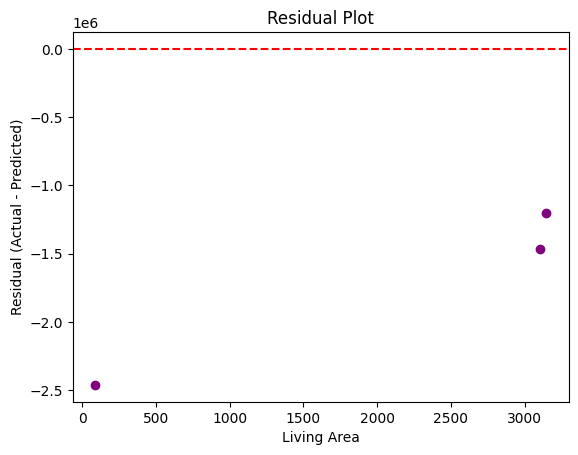

In [ ]:
from pyparsing import line


print('make grap of actual and predict value ')
X = data[['Living_Area']]   # features
y = data['Price']           # target

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Predictions from your model
y_predict = model.predict(x_test)

# Residuals DataFrame
df = pd.DataFrame({
    'Living_Area': x_test['Living_Area'],
    'Actual': y_test,
    'Predicted': y_predict
})
df['Residuals'] = df['Actual'] - df['Predicted']

plt.scatter(df['Living_Area'], df['Residuals'], color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Living Area")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()



**Find The Error Using Matrics**

In [ ]:
#import matrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('mean_squared_error:',mean_squared_error(y_test,y_predict))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predict))
print('r2_score:',r2_score(y_test,y_predict))

mean_squared_error: 3224371543429.766
mean_absolute_error: 1712093.7576277945
r2_score: -38.635790658918
